In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif
import statsmodels.api as sm

In [ ]:
df = pd.read_csv("Advertising.csv")

In [ ]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
# Therefore the data doesn't contain any null values

In [ ]:
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape

(134, 3)

In [ ]:
y_train.shape

(134,)

In [ ]:
X_test.shape

(66, 3)

In [ ]:
y_test.shape

(66,)

In [ ]:
regression_model = LinearRegression()

In [ ]:
regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regression_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)

In [ ]:
mse

3.727928330681507

In [ ]:
# Logistic Regression

In [ ]:
df_credit = pd.read_csv('Credit.csv')

In [ ]:
df_credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Defaultee
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,0
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0


In [ ]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  400 non-null    int64  
 1   Income      400 non-null    float64
 2   Limit       400 non-null    int64  
 3   Rating      400 non-null    int64  
 4   Cards       400 non-null    int64  
 5   Age         400 non-null    int64  
 6   Education   400 non-null    int64  
 7   Gender      400 non-null    object 
 8   Student     400 non-null    object 
 9   Married     400 non-null    object 
 10  Ethnicity   400 non-null    object 
 11  Balance     400 non-null    int64  
 12  Defaultee   400 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 40.8+ KB


In [ ]:
# No null values

In [ ]:
df_credit.columns

Index(['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance', 'Defaultee'],
      dtype='object')

In [ ]:
df_credit.describe()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance,Defaultee
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000,0.180000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877,0.384669
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000,0.000000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000,0.000000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000,0.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000,1.000000


In [ ]:
df_credit['Gender'] = df_credit['Gender'].map({'Male': 1, 'Female': 0})

In [ ]:
df_credit['Student'] = df_credit['Student'].map({'Yes': 1, 'No': 0})
df_credit['Married'] = df_credit['Married'].map({'Yes': 1, 'No': 0})

In [ ]:
df_credit['Ethnicity'].unique()

array(['Caucasian', 'Asian', 'African American'], dtype=object)

In [ ]:
df_credit['Ethnicity'] = df_credit['Ethnicity'].map({'Caucasian': 1, 'Asian': 2, 'African American': 3})

In [ ]:
df_credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Defaultee
0,1,14.891,3606,283,2,34,11,1,0,1,1,333,0
1,2,106.025,6645,483,3,82,15,0,1,1,2,903,0
2,3,104.593,7075,514,4,71,11,1,0,0,2,580,0
3,4,148.924,9504,681,3,36,11,0,0,0,2,964,0
4,5,55.882,4897,357,2,68,16,1,0,1,1,331,0


In [ ]:
X_credit = df_credit.drop('Defaultee',axis=1)

In [ ]:
X_credit

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,1,0,1,1,333
1,2,106.025,6645,483,3,82,15,0,1,1,2,903
2,3,104.593,7075,514,4,71,11,1,0,0,2,580
3,4,148.924,9504,681,3,36,11,0,0,0,2,964
4,5,55.882,4897,357,2,68,16,1,0,1,1,331
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,1,0,1,1,560
396,397,13.364,3838,296,5,65,17,1,0,0,3,480
397,398,57.872,4171,321,5,67,12,0,0,1,1,138
398,399,37.728,2525,192,1,44,13,1,0,1,1,0


In [ ]:
y_credit = df_credit['Defaultee']

In [ ]:
X_train_credit, X_test_credit, y_train_credit, y_test_credit = train_test_split(X_credit, y_credit, test_size=0.3, random_state=42)


In [ ]:
logistic_model = LogisticRegression()

In [ ]:
logistic_model.fit(X_train_credit, y_train_credit)

C:\Users\SOUVIK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_credit = logistic_model.predict(X_test_credit)

In [ ]:
accuracy_logistic = accuracy_score(y_test_credit, y_pred_credit)

In [ ]:
accuracy_logistic

0.95

In [ ]:
conf_matrix_logistic = confusion_matrix(y_test_credit, y_pred_credit)

In [ ]:
conf_matrix_logistic

array([[97,  4],
       [ 2, 17]], dtype=int64)

In [ ]:
svm_model = SVC()

In [ ]:
svm_model.fit(X_train_credit, y_train_credit)

SVC()

In [ ]:
y_pred_credit_svm = svm_model.predict(X_test_credit)

In [ ]:
accuracy_svm = accuracy_score(y_test_credit, y_pred_credit)

In [ ]:
accuracy_svm

0.95

In [ ]:
conf_matrix_svm = confusion_matrix(y_test_credit, y_pred_credit)

In [ ]:
conf_matrix_svm

array([[97,  4],
       [ 2, 17]], dtype=int64)

In [ ]:
X_Scatter = X_credit[['Balance','Income']]

In [ ]:
y_Scatter = y_credit

In [ ]:
scaler = StandardScaler()

In [ ]:
X_Scatter_scaled = scaler.fit_transform(X_Scatter)

In [ ]:
logistic_model_Scatter = LogisticRegression()

In [ ]:
logistic_model_Scatter.fit(X_Scatter, y_Scatter)

LogisticRegression()

In [ ]:
svm_model_Scatter = SVC()

In [ ]:
svm_model_Scatter.fit(X_Scatter_scaled, y_Scatter)

SVC()

In [ ]:
plt.figure(figsize=(12,6))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

Text(0, 0.5, 'Income')

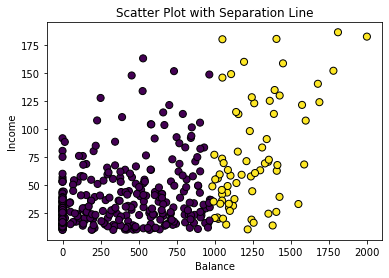

In [ ]:
plt.scatter(X_Scatter.iloc[:, 0], X_Scatter.iloc[:, 1], c=y_Scatter, cmap='viridis', edgecolors='k', s=50)
plt.title("Scatter Plot with Separation Line")
plt.xlabel("Balance")
plt.ylabel("Income")

TypeError: Input z must be 2D, not 1D

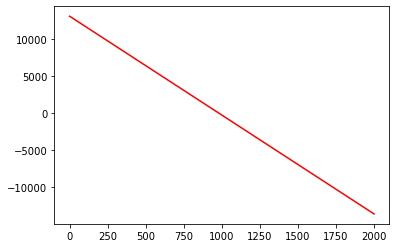

In [ ]:
# Plot logistic regression decision boundary
coef_logistic = logistic_model_Scatter.coef_[0]
intercept_logistic = logistic_model_Scatter.intercept_[0]
x_vals = np.linspace(X_Scatter.iloc[:, 0].min(), X_Scatter.iloc[:, 0].max(), 100)
y_vals_logistic = (-coef_logistic[0] / coef_logistic[1]) * x_vals - intercept_logistic / coef_logistic[1]
plt.plot(x_vals, y_vals_logistic, label="Logistic Regression", color='red')

# Plot SVM decision boundary
decision_function = svm_model_Scatter.decision_function(X_Scatter_scaled)
plt_contour = plt.contour(X_Scatter_scaled[:, 0], X_Scatter_scaled[:, 1], decision_function, levels=[0], linewidths=2, colors='blue')
plt.legend()
plt.show()

In [ ]:
# Anova Test
f_values, p_values = f_classif(X_credit, y_credit)
anova_results = pd.DataFrame({'Feature': X_credit.columns, 'F-Value': f_values, 'P-Value': p_values})
print("ANOVA Test Results:")
print(anova_results)


ANOVA Test Results:
       Feature     F-Value       P-Value
0   Unnamed: 0    0.035254  8.511595e-01
1       Income   78.609099  2.571368e-17
2        Limit  252.248530  2.396566e-44
3       Rating  259.693257  2.465673e-45
4        Cards    4.025334  4.549784e-02
5          Age    0.579367  4.470113e-01
6    Education    0.036607  8.483654e-01
7       Gender    0.004563  9.461796e-01
8      Student   33.242414  1.633990e-08
9      Married    0.313386  5.759248e-01
10   Ethnicity    0.024695  8.752103e-01
11     Balance  494.736145  8.163230e-72


In [ ]:
# Model Parameter Significance for Logistic Regression
X_train_credit_with_intercept = sm.add_constant(X_train_credit)
logit_model = sm.Logit(y_train_credit, X_train_credit_with_intercept)
result = logit_model.fit()
print(result.summary())

         Current function value: inf
         Iterations: 35


C:\Users\SOUVIK\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\SOUVIK\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: Singular matrix